Numba took time 0.14733
sum of abs residuals MARS 328.3432
sum of abs residuals DT 335.2478
sum of abs residuals MLP 324.5552


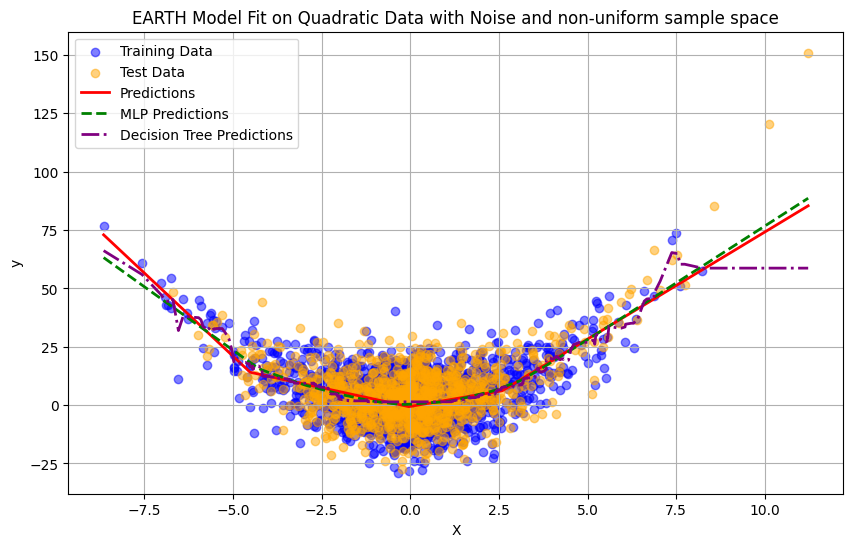

In [ ]:
from time import time as timer
import numpy as np
from matplotlib import pyplot as plt

from npearth.earth import EARTH
from npearth._knotsearcher_cholesky import KnotSearcherCholesky
from npearth._knotsearcher_cholesky_numba import KnotSearcherCholeskyNumba
from npearth._knotsearcher_svd import KnotSearcherSVD

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Step 1: Generate Sine Curve Data
def generate_data(n_samples=200, noise_level=0.1, random_state=42):
    np.random.seed(random_state)
    X = np.sort(np.random.laplace(0, 1.5, n_samples))
    y = 1 + 0.5*X + X**2  + np.random.normal(0, noise_level, n_samples)
    return X.reshape(-1, 1), y  # Reshape for sklearn compatibility

# Step 2: Split Data
n = 2000
X, y = generate_data(n_samples=n, noise_level=6.0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)


earth_model_np = EARTH(M_max=15)
t2 = timer()
earth_model_np.fit(X_train, y_train)
t3 = timer()
print(f"Numba took time {round(t3-t2,5)}")

mlp = MLPRegressor(hidden_layer_sizes=(30, 30, 30), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X)
y_pred_test_mlp = mlp.predict(X_test)

dt = RandomForestRegressor(max_depth=4)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X)
y_pred_test_dt = dt.predict(X_test)

# Step 4: Make Predictions
y_pred = earth_model_np.predict(X)
y_pred_test = earth_model_np.predict(X_test)
# y_pred_svd = earth_model_svd.predict(X)

print(
    "sum of abs residuals MARS", np.sqrt(sum((y_test - y_pred_test) ** 2)).round(4)
)
print(
    "sum of abs residuals DT", np.sqrt(sum((y_test - y_pred_test_dt) ** 2)).round(4)
)
print(
    "sum of abs residuals MLP",
    np.sqrt(sum((y_test - y_pred_test_mlp) ** 2)).round(4),
)

# Step 5: Visualize Results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="blue", label="Training Data", alpha=0.5)
plt.scatter(X_test, y_test, color="orange", label="Test Data", alpha=0.5)
plt.plot(X, y_pred, color="red", label="Predictions", linewidth=2)
plt.plot(
    X,
    y_pred_mlp,
    color="green",
    label="MLP Predictions",
    linewidth=2,
    linestyle="--",
)

plt.plot(
    X,
    y_pred_dt,
    color="purple",
    label="Decision Tree Predictions",
    linewidth=2,
    linestyle="-.",
)
plt.title("EARTH Model Fit on Quadratic Data with Noise and non-uniform sample space")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()
